In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Loading the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


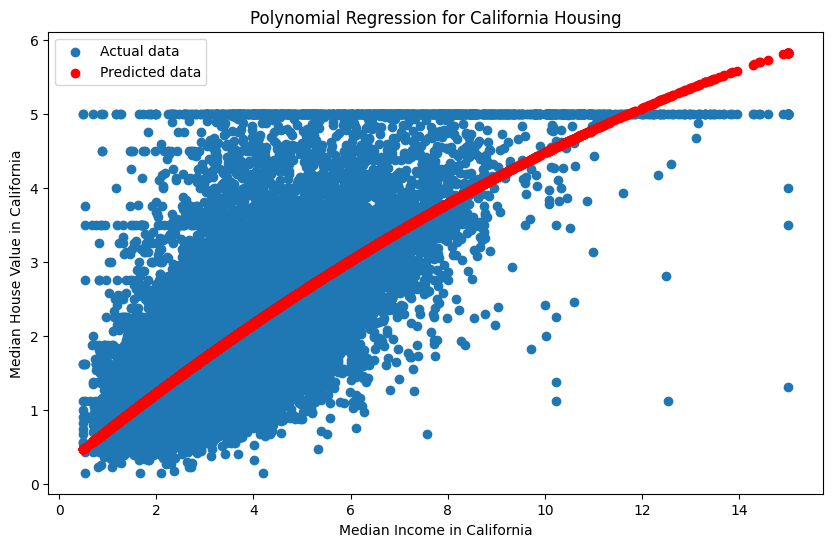

MSE:  0.695037253723973


In [37]:
# Select feature and target
X = df[["MedInc"]]
y = df[["MedHouseVal"]]

# transforming feature to polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)
print(model.get_params())

# Make predictions
y_pred = model.predict(X_poly)


# Plotting actual vs predicted data
plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Actual data")
plt.scatter(X, y_pred, color="red", label="Predicted data")
plt.title("Polynomial Regression for California Housing")
plt.xlabel("Median Income in California")
plt.ylabel("Median House Value in California")
plt.legend()
plt.show()

# Evaluate model performance
mse = mean_squared_error(y, y_pred)
print("MSE: ", mse)

[ 0.53358335 -0.01050737]
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Ridge Regression MSE:  0.7032732202728617
[0.3136868  0.00718293]
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Lasso Regression MSE:  0.7211823140579732


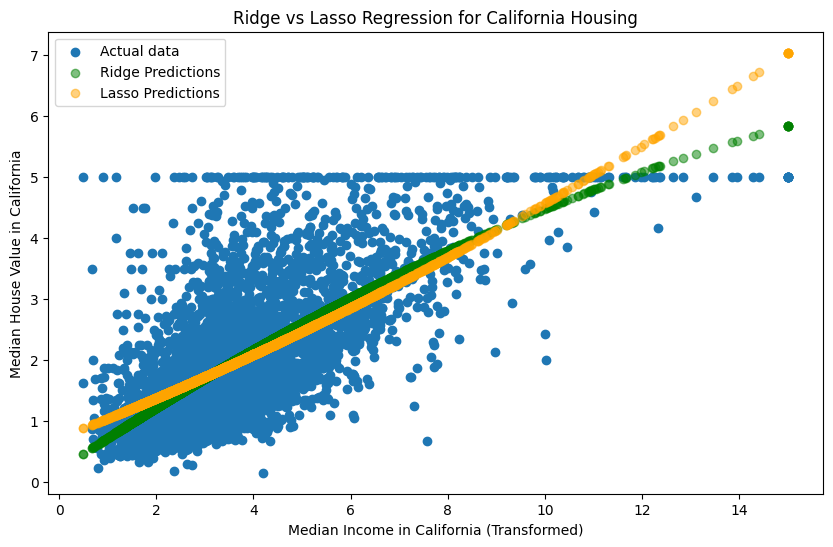

In [40]:
# Using Lasso and Ridge Regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

#  Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(ridge_model.coef_)
print(ridge_model.get_params())
print("Ridge Regression MSE: ", ridge_mse)

#  Evaluate Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(lasso_model.coef_)
print(lasso_model.get_params())
print("Lasso Regression MSE: ", lasso_mse)

# Visualize Ridge aand Lasso predictions
plt.figure(figsize=(10,6))
plt.scatter(X_test[:, 0], y_test, label="Actual data")
plt.scatter(X_test[:, 0], ridge_predictions, color="green", label="Ridge Predictions", alpha=0.5)
plt.scatter(X_test[:, 0], lasso_predictions, color="orange", label="Lasso Predictions", alpha=0.5)
plt.title("Ridge vs Lasso Regression for California Housing")
plt.xlabel("Median Income in California (Transformed)")
plt.ylabel("Median House Value in California")
plt.legend()
plt.show()

## Note: I am going to try including more features like HouseAge, AveRooms.